# CNN para reconhecimento de imagens
## Dataset Dogs & Cats - Kaggle
*Cleuton Sampaio*

[Dataset Dogs & cats](https://www.kaggle.com/c/dogs-vs-cats)
Baixe o arquivos e descompacte conforme as variáveis **dir_treino** e **dir_teste**. Coloque labels em pelo menos 30 imagens de teste, para poder validar (é só renomear os arquivos como os de treino).

In [1]:
import keras 
import keras.backend as K
import os, random
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten, Dropout
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
import cv2 
from keras.preprocessing import image
%matplotlib inline


In [2]:
batch_sz = 128 # Batch size
nb_class = 2  # Número de classes
nb_epochs = 20 # Número de epochs de treinamento
img_h, img_w = 64, 64 # Altura e largura das imagens
dir_treino = './dogscats/train/'
dir_teste = './dogscats/test/'

# Preparar arquivos de imagens

In [3]:
def ler_imagem(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imres = cv2.resize(gray, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
    imres = image.img_to_array(imres.T)
    imres = np.expand_dims(imres, axis = 0)    
    return imres

In [4]:
def gerar_dataset(filenames):
    rotulos = []
    dataset = np.ndarray((len(filenames), img_h, img_w, 1), dtype=np.uint8)
    x = 0
    for arquivo in filenames:
        dataset[x] = ler_imagem(arquivo)
        if '/person' in arquivo: 
            rotulos.append(0)
        else:
            rotulos.append(1)
        x = x + 1
        if x%1000==0:
            print("Processados ",x)
    return dataset, rotulos

imagens_treino = [dir_treino+i for i in os.listdir(dir_treino) if '.jpeg' in i]
random.shuffle(imagens_treino)
imagens_teste  = [dir_teste+i for i in os.listdir(dir_teste) if '.jpeg' in i]
x_treino, y_treino = gerar_dataset(imagens_treino)
x_teste, y_teste  = gerar_dataset(imagens_teste)

Processados  1000
Processados  2000
Processados  3000
Processados  4000
Processados  5000


In [5]:
im = ler_imagem(imagens_treino[0])
print(im.shape)

(1, 64, 64, 1)


In [6]:
def conv3x3(input_x,nb_filters):
    # Prepara a camada convolucional
    return Conv2D(nb_filters, kernel_size=(3,3), use_bias=False,
               activation='relu', padding="same")(input_x)

In [7]:

# Normaliza os valores dos pixels
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_treino /= 255.0
x_teste /= 255.0

# Converte os rótulos para "One-hot encoding": 
y_treino = keras.utils.to_categorical(y_treino, nb_class)
y_teste = keras.utils.to_categorical(y_teste, nb_class)

# Cria o modelo executando um treino e avaliação:
inputs = Input(shape=(img_h, img_w, 1))
x = conv3x3(inputs, 32)
x = conv3x3(x, 32)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = conv3x3(x, 64)
x = conv3x3(x, 64)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = conv3x3(x, 128)
x = MaxPooling2D(pool_size=(2,2))(x) 
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
preds = Dense(nb_class, activation='softmax')(x)
model = Model(inputs=inputs, outputs=preds)




## Rode a célula seguinte se desejar carregar um modelo salvo

In [8]:
model.load_weights("dogs_cats_saved.h5")

## Carregando ou não, rode a próxima célula

In [9]:
# Compila o modelo: 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



## Rode a célula seguinte para treinar novamente a CNN

In [10]:
# Cria um callback para salvar o modelo a cada "epoch" de treinamento completada: 
callback = ModelCheckpoint('dogs_cats_saved.h5')

# Treina o modelo (demora cerca de 6 minutos sem GPU):
history = model.fit(x_treino, y_treino,
          batch_size=batch_sz,
          epochs=nb_epochs,
          verbose=1,
          validation_data=(x_teste, y_teste), 
          callbacks=[callback])

# Avalia o modelo com dados de teste:
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Perda:', score[0])
print('Acurácia:', score[1])

# Plota gráficos de perda e acurácia: 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
41/41 [==============================] - 2s 54ms/step - loss: 9.7905e-04 - accuracy: 0.9996 - val_loss: 7.3769 - val_accuracy: 0.7548
Epoch 2/20
41/41 [==============================] - 1s 36ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 5.0620 - val_accuracy: 0.7997
Epoch 3/20
41/41 [==============================] - 1s 36ms/step - loss: 6.9224e-04 - accuracy: 0.9996 - val_loss: 7.0636 - val_accuracy: 0.7660
Epoch 4/20
41/41 [==============================] - 1s 36ms/step - loss: 1.2761e-04 - accuracy: 1.0000 - val_loss: 5.6926 - val_accuracy: 0.7933
Epoch 5/20
41/41 [==============================] - 1s 36ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 6.4926 - val_accuracy: 0.7548
Epoch 6/20
41/41 [==============================] - 1s 34ms/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 3.1549 - val_accuracy: 0.7869
Epoch 7/20
41/41 [==============================] - 1s 36ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 4.2213 - val_accuracy: 0.7612
E

KeyError: 'acc'

## Rode a célula seguinte para validar o modelo com imagens novas

['./dogscats/validate/NORMAL2-IM-1427-0001.jpeg', './dogscats/validate/NORMAL2-IM-1430-0001.jpeg', './dogscats/validate/NORMAL2-IM-1431-0001.jpeg', './dogscats/validate/person1946_bacteria_4874.jpeg', './dogscats/validate/person1946_bacteria_4875.jpeg', './dogscats/validate/person1947_bacteria_4876.jpeg']
Tende a nao ter
Tende a ter
Tende a nao ter
Tende a ter
Tende a ter
Tende a ter


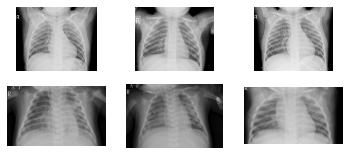

In [11]:
dir_validar = "./dogscats/validate/"
nomes = [dir_validar+i for i in os.listdir(dir_validar) if '.jpeg' in i]
print(nomes)

def prepararImagem(imagem):
    test_image = image.img_to_array(imagem.T)
    test_image = np.expand_dims(test_image, axis = 0)    
    return test_image

def mostraCateg(resultado):
    categs = ["Tende a ter", "Tende a nao ter"]
    for idx, val in enumerate(resultado[0]):
        if val == 1:
            return categs[idx]
    
i = 1
for nome in nomes:
    im = cv2.imread(nome)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imres = cv2.resize(gray, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
    dados = prepararImagem(imres)
    plt.subplot(3, 3, i)
    i = i + 1
    plt.imshow(gray,cmap='gray')
    plt.axis('off')
    ret = model.predict(dados, batch_size=1) 
    print(mostraCateg(ret))    
    